In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Customer_Attrition

/content/drive/MyDrive/Customer_Attrition


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [ ]:
df=pd.read_csv("train.csv")
df.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [ ]:
df_missing = df.isna()
df_missing

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6334,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6335,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6336,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_num_missing = df_missing.sum()
df_num_missing

ID                      0
sex                     0
Aged                    0
Married                 0
TotalDependents         0
ServiceSpan             0
MobileService           0
4GService               0
CyberProtection         0
HardwareSupport         0
TechnicalAssistance     0
FilmSubscription        0
SettlementProcess       0
QuarterlyPayment        0
GrandPayment           10
CustomerAttrition       0
dtype: int64

In [ ]:
df1=df.dropna()
df1

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,Y7U717HO87PCW6XXIQA1,Female,Yes,No,No,3,Yes,Wifi Broadband,No,Yes,No,Yes,Card,100.391595,441.914530,Yes
6334,NGY3WOQ0OT1P4RHAR0PT,Female,Yes,No,No,-1,Yes,Satellite Broadband,No,No,No,Yes,Bank,44.782165,45.308180,No
6335,ZBBW7H8AYLZJ2HK5TBBJ,Male,No,No,Yes,18,Yes,No,No,No,No,No,Electronic,35.941713,552.181341,Yes
6336,BUE75NSSLT2S2URTKZRN,Male,No,Yes,No,46,Yes,No,No,No,No,Yes,Card,94.762984,4563.812326,No


In [ ]:
df1_miss = df1.isna()
df1_num_miss = df1_miss.sum()
df1_num_miss

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           0
CustomerAttrition      0
dtype: int64

In [ ]:
df2=df1.drop("ID",axis=1)
df2.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [ ]:
df.dtypes

ID                      object
sex                     object
Aged                    object
Married                 object
TotalDependents         object
ServiceSpan              int64
MobileService           object
4GService               object
CyberProtection         object
HardwareSupport         object
TechnicalAssistance     object
FilmSubscription        object
SettlementProcess       object
QuarterlyPayment       float64
GrandPayment           float64
CustomerAttrition       object
dtype: object

In [ ]:
for column in df2:
  print(f"{column}:{df2[column].unique()}")

sex:['Female' 'Male']
Aged:['No' 'Yes']
Married:['No' 'Yes']
TotalDependents:['Yes' 'No']
ServiceSpan:[48 45 59 14 25 27 53  0  1 46 67 24 61 54  9 30 18  5 64  3 41 40 31 21
 15  6 69 72 33 71  2 36  8 37 34 28 -1 60 22 68 11 39 58 10 50  4 44 49
 38 55 51 16 65 13 26 19 57 70 73 42 35 62 23 56 47 63 32 29  7 20 43 12
 52 17 66]
MobileService:['Yes' 'No']
4GService:['Wifi Broadband' 'Satellite Broadband' 'No']
CyberProtection:['No' 'Yes']
HardwareSupport:['Yes' 'No']
TechnicalAssistance:['Yes' 'No']
FilmSubscription:['No' 'Yes']
SettlementProcess:['Check' 'Bank' 'Card' 'Electronic']
QuarterlyPayment:[ 96.25980197  18.87647016 106.0160571  ...  35.94171339  94.76298428
  94.3373432 ]
GrandPayment:[4628.129119   922.0859985 6205.891129  ...  552.1813408 4563.812326
 5756.542013 ]
CustomerAttrition:['Yes' 'No']


In [ ]:
rhetorical_col = ['Aged','Married','TotalDependents','MobileService','CyberProtection','HardwareSupport','TechnicalAssistance','FilmSubscription','CustomerAttrition']
for columns in rhetorical_col:
  df2[columns].replace({'Yes': 1,'No': 0},inplace= True)

df2.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,Female,0,0,1,48,1,Wifi Broadband,0,1,1,0,Check,96.259802,4628.129119,1
1,Male,0,1,0,45,1,Wifi Broadband,0,0,0,1,Bank,18.876470,922.085998,0
2,Male,1,1,0,59,1,Wifi Broadband,1,0,1,0,Card,106.016057,6205.891129,1
3,Male,0,0,0,14,1,Wifi Broadband,0,0,0,0,Check,80.108839,1248.655391,0
4,Female,0,1,1,25,1,Wifi Broadband,0,1,0,1,Check,51.529773,1285.321277,0


In [ ]:
df2['sex'].replace({'Female': 1,'Male': 0},inplace= True)

In [ ]:
for column in df2:
  print(f"{column}:{df2[column].unique()}")

sex:[1 0]
Aged:['No' 'Yes']
Married:['No' 'Yes']
TotalDependents:['Yes' 'No']
ServiceSpan:[48 45 59 14 25 27 53  0  1 46 67 24 61 54  9 30 18  5 64  3 41 40 31 21
 15  6 69 72 33 71  2 36  8 37 34 28 -1 60 22 68 11 39 58 10 50  4 44 49
 38 55 51 16 65 13 26 19 57 70 73 42 35 62 23 56 47 63 32 29  7 20 43 12
 52 17 66]
MobileService:['Yes' 'No']
4GService:['Wifi Broadband' 'Satellite Broadband' 'No']
CyberProtection:['No' 'Yes']
HardwareSupport:['Yes' 'No']
TechnicalAssistance:['Yes' 'No']
FilmSubscription:['No' 'Yes']
SettlementProcess:['Check' 'Bank' 'Card' 'Electronic']
QuarterlyPayment:[ 96.25980197  18.87647016 106.0160571  ...  35.94171339  94.76298428
  94.3373432 ]
GrandPayment:[4628.129119   922.0859985 6205.891129  ...  552.1813408 4563.812326
 5756.542013 ]
CustomerAttrition:['Yes' 'No']


In [ ]:
df3 = pd.get_dummies(data = df2,columns = ['4GService','SettlementProcess'])
df3.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,CustomerAttrition,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,1,No,No,Yes,48,Yes,No,Yes,Yes,No,96.259802,4628.129119,Yes,0,0,1,0,0,1,0
1,0,No,Yes,No,45,Yes,No,No,No,Yes,18.876470,922.085998,No,0,0,1,1,0,0,0
2,0,Yes,Yes,No,59,Yes,Yes,No,Yes,No,106.016057,6205.891129,Yes,0,0,1,0,1,0,0
3,0,No,No,No,14,Yes,No,No,No,No,80.108839,1248.655391,No,0,0,1,0,0,1,0
4,1,No,Yes,Yes,25,Yes,No,Yes,No,Yes,51.529773,1285.321277,No,0,0,1,0,0,1,0


In [ ]:
df3.dtypes

sex                                int64
Aged                              object
Married                           object
TotalDependents                   object
ServiceSpan                        int64
MobileService                     object
CyberProtection                   object
HardwareSupport                   object
TechnicalAssistance               object
FilmSubscription                  object
QuarterlyPayment                 float64
GrandPayment                     float64
CustomerAttrition                 object
4GService_No                       uint8
4GService_Satellite Broadband      uint8
4GService_Wifi Broadband           uint8
SettlementProcess_Bank             uint8
SettlementProcess_Card             uint8
SettlementProcess_Check            uint8
SettlementProcess_Electronic       uint8
dtype: object

In [ ]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaling_columns = ['ServiceSpan','QuarterlyPayment','GrandPayment']
df3[scaling_columns] = scaler.fit_transform(df3[scaling_columns])

In [ ]:
df3.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,CustomerAttrition,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,1,No,No,Yes,0.662162,Yes,No,Yes,Yes,No,0.769434,0.531957,Yes,0,0,1,0,0,1,0
1,0,No,Yes,No,0.621622,Yes,No,No,No,Yes,0.022887,0.104479,No,0,0,1,1,0,0,0
2,0,Yes,Yes,No,0.810811,Yes,Yes,No,Yes,No,0.863556,0.713946,Yes,0,0,1,0,1,0,0
3,0,No,No,No,0.202703,Yes,No,No,No,No,0.613619,0.142148,No,0,0,1,0,0,1,0
4,1,No,Yes,Yes,0.351351,Yes,No,Yes,No,Yes,0.337906,0.146377,No,0,0,1,0,0,1,0


In [ ]:
df3['CustomerAttrition'].value_counts()

No     4648
Yes    1680
Name: CustomerAttrition, dtype: int64

In [ ]:
train_x = df3.drop('CustomerAttrition',axis = 1)
train_y = df3['CustomerAttrition']

In [ ]:
train_x

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,1,No,No,Yes,0.662162,Yes,No,Yes,Yes,No,0.769434,0.531957,0,0,1,0,0,1,0
1,0,No,Yes,No,0.621622,Yes,No,No,No,Yes,0.022887,0.104479,0,0,1,1,0,0,0
2,0,Yes,Yes,No,0.810811,Yes,Yes,No,Yes,No,0.863556,0.713946,0,0,1,0,1,0,0
3,0,No,No,No,0.202703,Yes,No,No,No,No,0.613619,0.142148,0,0,1,0,0,1,0
4,1,No,Yes,Yes,0.351351,Yes,No,Yes,No,Yes,0.337906,0.146377,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,1,Yes,No,No,0.054054,Yes,No,Yes,No,Yes,0.809294,0.049093,0,0,1,0,1,0,0
6334,1,Yes,No,No,0.000000,Yes,No,No,No,Yes,0.272809,0.003346,0,1,0,1,0,0,0
6335,0,No,No,Yes,0.256757,Yes,No,No,No,No,0.187522,0.061812,1,0,0,0,0,0,1
6336,0,No,Yes,No,0.635135,Yes,No,No,No,Yes,0.754993,0.524539,1,0,0,0,1,0,0


In [ ]:
train_y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
6333    Yes
6334     No
6335    Yes
6336     No
6337     No
Name: CustomerAttrition, Length: 6328, dtype: object

**ANN MODEL**

In [ ]:
ann1 = keras.models.Sequential()
ann1.add(keras.layers.Dense(units = 8, activation='relu'))
#ann1.add(keras.layers.Dense(units = 16, activation='relu'))
ann1.add(keras.layers.Dense(units = 1))
ann1.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])
ann1.fit(train_x, train_y, epochs = 100)

Epoch 1/100
198/198 [==============================] - 1s 1ms/step - loss: 1.0211 - accuracy: 0.6577
Epoch 2/100
198/198 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.7202
Epoch 3/100
198/198 [==============================] - 0s 1ms/step - loss: 0.5951 - accuracy: 0.7261
Epoch 4/100
198/198 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7520
Epoch 5/100
198/198 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7544
Epoch 6/100
198/198 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7733
Epoch 7/100
198/198 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7748
Epoch 8/100
198/198 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7840
Epoch 9/100
198/198 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7839
Epoch 10/100
198/198 [==============================] - 0s 1ms/step - loss: 0.4644 - accura

In [ ]:
test_data = pd.read_csv("test.csv")
test_data

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
0,WMORTPCG3HTIPEFSGUFY,Male,No,No,No,8,Yes,Wifi Broadband,No,No,No,Yes,Check,21.299937,151.092519
1,GBLPEA16C3KGBO57KEFO,Female,No,No,No,26,Yes,Satellite Broadband,No,Yes,No,Yes,Check,56.609623,1553.276979
2,IDCQS0CO5P29AMKY3LO1,Male,No,No,No,66,Yes,Satellite Broadband,No,No,No,Yes,Card,25.167690,1684.262416
3,1IY29SDITYU6IFZ4KJB0,Female,Yes,No,No,31,Yes,Satellite Broadband,No,No,Yes,Yes,Bank,55.560968,1829.874462
4,T5XMW5B0YPCONH30WJD2,Female,No,Yes,Yes,21,Yes,Satellite Broadband,No,No,No,No,Bank,20.070002,489.818170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,8M7JJ5JBQUIA0ORLJ1UU,Female,No,Yes,No,67,Yes,Satellite Broadband,No,Yes,Yes,No,Card,109.033026,7345.910050
701,WS1T1FLY87G9A1UNKST4,Male,No,No,No,2,Yes,Wifi Broadband,No,No,No,No,Card,71.468072,130.565363
702,0XG96FS1KXZSULPSGA1X,Female,No,Yes,No,22,Yes,Wifi Broadband,No,Yes,No,Yes,Electronic,102.930468,2392.842382
703,YR858QHNQMCDBCT9JRP6,Female,No,No,No,4,Yes,Wifi Broadband,No,No,No,No,Electronic,51.862869,263.231362


In [ ]:
test_data_miss = test_data.isna()
test_data_num_miss = test_data_miss.sum()
test_data_num_miss

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           1
dtype: int64

In [ ]:
test_data2=test_data.drop("ID",axis=1)

rhetorical_col_test = ['Aged','Married','TotalDependents','MobileService','CyberProtection','HardwareSupport','TechnicalAssistance','FilmSubscription']
for columns in rhetorical_col_test:
  test_data2[columns].replace({'Yes': 1,'No': 0},inplace= True)

test_data2['sex'].replace({'Female': 1,'Male': 0},inplace= True)

test_data3 = pd.get_dummies(data = test_data2,columns = ['4GService','SettlementProcess'])

scaling_columns_test = ['ServiceSpan','QuarterlyPayment','GrandPayment']
test_data3[scaling_columns_test] = scaler.fit_transform(test_data3[scaling_columns_test])

In [ ]:
test_data3

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
0,0,0,0,0,0.121622,1,0,0,0,1,0.049036,0.015608,0,0,1,0,0,1,0
1,1,0,0,0,0.364865,1,0,1,0,1,0.394966,0.180034,0,1,0,0,0,1,0
2,0,0,0,0,0.905405,1,0,0,0,1,0.086928,0.195394,0,1,0,0,1,0,0
3,1,1,0,0,0.432432,1,0,0,1,1,0.384693,0.212469,0,1,0,1,0,0,0
4,1,0,1,1,0.297297,1,0,0,0,0,0.036986,0.055328,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1,0,1,0,0.918919,1,0,1,1,0,0.908562,0.859303,0,1,0,0,1,0,0
701,0,0,0,0,0.040541,1,0,0,0,0,0.540536,0.013201,0,0,1,0,1,0,0
702,1,0,1,0,0.310811,1,0,1,0,1,0.848774,0.278485,0,0,1,0,0,0,1
703,1,0,0,0,0.067568,1,0,0,0,0,0.348462,0.028758,0,0,1,0,0,0,1


In [ ]:
my_predictions = ann1.predict(test_data3)
my_predictions

array([[ 1.51273027e-01],
       [ 1.91516906e-01],
       [ 3.12864222e-02],
       [ 1.99637294e-01],
       [ 8.35143402e-02],
       [ 4.19999599e-01],
       [ 1.58798218e-01],
       [ 6.66152477e-01],
       [ 7.85935879e-01],
       [ 3.27181697e-01],
       [ 1.39107704e-01],
       [ 4.38946247e-01],
       [ 2.61534780e-01],
       [ 5.35152078e-01],
       [ 1.39931500e-01],
       [ 7.15909719e-01],
       [ 1.93187580e-01],
       [ 3.03385556e-02],
       [ 1.63847104e-01],
       [ 6.37370706e-01],
       [ 3.98794770e-01],
       [ 4.92414571e-02],
       [ 4.75202918e-01],
       [ 6.87634826e-01],
       [ 2.89478600e-01],
       [ 7.14592338e-01],
       [ 4.83448505e-02],
       [ 4.63136971e-01],
       [-5.26925027e-02],
       [ 2.96918541e-01],
       [ 9.09088552e-01],
       [ 9.80358720e-02],
       [ 1.42417431e-01],
       [ 4.78328466e-01],
       [ 8.93729627e-02],
       [ 3.29587273e-02],
       [ 4.94707301e-02],
       [ 6.48374677e-01],
       [ 8.6

In [ ]:
predicted_y = []
for values in my_predictions:
  if values > 0.6:
    predicted_y.append(1)
  else:
    predicted_y.append(0)

In [ ]:
print(predicted_y)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 

In [ ]:
submission = pd.DataFrame({'ID': test_data.ID.values, 'CustomerAttrition': predicted_y})
submission03 = submission
submission03['CustomerAttrition'].replace({1: 'Yes', 0: 'No'},inplace = True)
submission03.to_csv("my_submission3ANN2.csv", index=False)

submission03.head()

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No


**ML MODELS**

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 57kB/s 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

**K FOLD CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [ ]:
score = cross_val_score(GradientBoostingClassifier(),train_x, train_y )

GBavg_score = score.mean()

In [ ]:
XGBmodel = XGBClassifier(seed=20,
                        objective='binary:logistic',
                        gamma=5,
                        learn_rate=0.1,
                        n_estimators=100,
                        max_depth=5,
                        reg_lambda=12,
                        reg_alpha=0,
                        scale_pos_weight=1,
                        subsample=0.9,
                        colsample_bytree=0.5)
score = cross_val_score(XGBmodel, train_x, train_y)

Xavg_score = score.mean()
print(Xavg_score)

0.7975638936240627


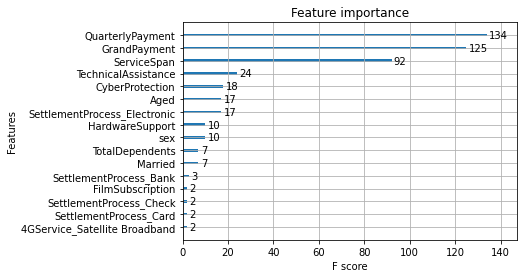

In [ ]:
XGBmodel.fit(train_x,train_y)
plot_importance(XGBmodel)
plt.show()

In [ ]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

test_data4 = test_data3
test_data4['GrandPayment'] = test_data4['GrandPayment'].replace(np.nan, 0)

thresholds = sort(XGBmodel.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(XGBmodel, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_x)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, train_y)
    # eval model
    #test01_y = test[['CustomerAttrition']]
    #Y = train_y.iloc[:, 1:2].values
    select_X_test = selection.transform(test_data4)
    y_pred = selection_model.predict(select_X_test)
    #predictions = [round(value) for value in y_pred]
    #print(predictions)
    #accuracy = accuracy_score( predictions, test_y)
    #print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [ ]:
fXpredicted_y = []
for values in y_pred:
  if values > 0.5:
    fXpredicted_y.append(1)
  else:
    fXpredicted_y.append(0)

submission = pd.DataFrame({'ID': test_data.ID.values, 'CustomerAttrition': fXpredicted_y})
submission03 = submission
submission03['CustomerAttrition'].replace({1: 'Yes', 0: 'No'},inplace = True)
submission03.to_csv("my_submissionfXGB_drops.csv", index=False)
submission03['CustomerAttrition'].value_counts()
submission03.head()

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No


In [ ]:
score = cross_val_score(AdaBoostClassifier(),train_x, train_y )

ABavg_score = score.mean()

In [ ]:
score = cross_val_score(CatBoostClassifier(),train_x, train_y )

CBavg_score = score.mean()

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6377641	total: 66.3ms	remaining: 13.2s
5:	learn: 0.6283570	total: 69.7ms	remaining: 11.6s
6:	learn: 0.6190611	total: 73.2ms	remaining: 10.4s
7:	learn: 0.6104517	total: 76.6ms	remaining: 9.49s
8:	learn: 0.6024701	total: 79.9ms	remaining: 8.8s
9:	learn: 0.5954183	total: 83.3ms	remaining: 8.24s
10:	learn: 0.5880683	total: 86.6ms	remaining: 7.78s
11:	learn: 0.5817792	total: 89.9ms	remaining: 7.4s
12:	learn: 0.5747456	total: 93.2ms	remaining: 7.08s
13:	learn: 0.5687366	total: 96.8ms	remaining: 6.82s
14:	learn: 0.5635002	total: 100ms	remaining: 6.59s
15:	learn: 0.5581971	total: 104ms	remaining: 6.41s
16:	learn: 0.5532321	total: 108ms	remaining: 6.24s
17:	learn: 0.5476692	total: 112ms	remaining: 6.09s
18:	learn: 0.5423253	total: 115ms	remaining: 5.95s
19:	learn: 0.5378071	total: 118ms	remaining: 5.79s
20:	learn: 0.5332138	total: 122ms	remaining: 5.68s
21:	learn: 0.5287759	total: 126ms	remaining: 5.58s
22:	learn: 0.5241342	total: 1

In [ ]:
score = cross_val_score(LogisticRegression(C=1,penalty="l2"),train_x, train_y )
LRavg_score = score.mean()

In [ ]:
score = cross_val_score(RandomForestClassifier(),train_x, train_y )

RFavg_score = score.mean()

In [ ]:
score = cross_val_score(SVC(),train_x, train_y )

Savg_score = score.mean()

In [ ]:
score = cross_val_score(MultinomialNB(),train_x, train_y )

NBavg_score = score.mean()

In [ ]:
score = cross_val_score(KNeighborsClassifier(),train_x, train_y )
 
KNavg_score = score.mean()

In [ ]:
score = cross_val_score(DecisionTreeClassifier(),train_x, train_y )
DTavg_score = score.mean()

In [ ]:
from lightgbm import LGBMClassifier
score = cross_val_score(LGBMClassifier(learning_rate=0.12, min_child_samples=30, n_estimators=90,num_leaves=60),train_x, train_y )
LGBavg_score = score.mean()

In [ ]:
from sklearn.naive_bayes import GaussianNB
score = cross_val_score(GaussianNB(),train_x, train_y )

GNBavg_score = score.mean()
print(GNBavg_score)

0.7561599510455889


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
score = cross_val_score(ExtraTreesClassifier(),train_x, train_y )

XTavg_score = score.mean()
print(XTavg_score)

0.7669053194212889


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
score = cross_val_score(PassiveAggressiveClassifier(),train_x, train_y )

PAavg_score = score.mean()
print(PAavg_score)

0.6915489949984077


In [ ]:
from sklearn.linear_model import SGDClassifier
score = cross_val_score(SGDClassifier(),train_x, train_y )

SGDavg_score = score.mean()
print(SGDavg_score)

0.782554246358079


In [ ]:
from sklearn.naive_bayes import BernoulliNB
score = cross_val_score(BernoulliNB(),train_x, train_y )

BNBavg_score = score.mean()
print(BNBavg_score)

0.7686453240419859


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

#clf = BaggingClassifier(base_estimator=SVC(),
#                        n_estimators=10, random_state=0).fit(train_x, train_y)
score = cross_val_score(BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0),train_x, train_y )

BGavg_score = score.mean()
print(BGavg_score)

0.7858707828334863


**RESULT**

In [ ]:
compare = pd.DataFrame({'Models': ['LGBMClassifier','GradientBoostingClassifier','LogisticRegression','SVC','RandomForestClassifier','KNeighborsClassifier','DecisionTreeClassifier','MultinomialNB','XGBClassifier','AdaBoostClassifier','CatBoostClassifier'],
                        'Score': [LGBavg_score,GBavg_score,LRavg_score, Savg_score, RFavg_score, KNavg_score, DTavg_score, NBavg_score, Xavg_score, ABavg_score, CBavg_score]})
compare_df = compare.sort_values(by='Score',ascending = False)
compare_df = compare_df.set_index('Score')
compare_df.reset_index()

,Score,Models
0,0.797564,XGBClassifier
1,0.794562,GradientBoostingClassifier
2,0.792824,AdaBoostClassifier
3,0.790296,CatBoostClassifier
4,0.790139,LogisticRegression
5,0.784765,SVC
6,0.784764,RandomForestClassifier
7,0.773860,LGBMClassifier
8,0.767065,MultinomialNB
9,0.740831,KNeighborsClassifier


**SUBMISSIONS**

In [ ]:
train01_x = train_x.drop('SettlementProcess_Bank',axis=1)
train02_x = train01_x.drop('SettlementProcess_Card',axis=1)
train03_x = train02_x.drop('SettlementProcess_Check',axis=1)
train04_x = train03_x.drop('SettlementProcess_Electronic',axis=1)
train04_x.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband
0,1,0,0,1,0.662162,1,0,1,1,0,0.769434,0.531957,0,0,1
1,0,0,1,0,0.621622,1,0,0,0,1,0.022887,0.104479,0,0,1
2,0,1,1,0,0.810811,1,1,0,1,0,0.863556,0.713946,0,0,1
3,0,0,0,0,0.202703,1,0,0,0,0,0.613619,0.142148,0,0,1
4,1,0,1,1,0.351351,1,0,1,0,1,0.337906,0.146377,0,0,1


In [ ]:
test01_x = test_data3.drop('SettlementProcess_Bank',axis=1)
test02_x = test01_x.drop('SettlementProcess_Card',axis=1)
test03_x = test02_x.drop('SettlementProcess_Check',axis=1)
test04_x = test03_x.drop('SettlementProcess_Electronic',axis=1)
test04_x.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband
0,0,0,0,0,0.121622,1,0,0,0,1,0.049036,0.015608,0,0,1
1,1,0,0,0,0.364865,1,0,1,0,1,0.394966,0.180034,0,1,0
2,0,0,0,0,0.905405,1,0,0,0,1,0.086928,0.195394,0,1,0
3,1,1,0,0,0.432432,1,0,0,1,1,0.384693,0.212469,0,1,0
4,1,0,1,1,0.297297,1,0,0,0,0,0.036986,0.055328,0,1,0


In [ ]:
Xmodel = XGBClassifier()
Xmodel.fit(train_x, train_y)
Xprediction = Xmodel.predict(test_data3)
print(Xprediction)

Xpredicted_y = []
for values in Xprediction:
  if values > 0.5:
    Xpredicted_y.append(1)
  else:
    Xpredicted_y.append(0)

submission = pd.DataFrame({'ID': test_data.ID.values, 'CustomerAttrition': Xpredicted_y})
submission03 = submission
submission03['CustomerAttrition'].replace({1: 'Yes', 0: 'No'},inplace = True)
#submission03.to_csv("my_submissionXGB_drops.csv", index=False)
submission03['CustomerAttrition'].value_counts()
#submission03.head()

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 

No     572
Yes    133
Name: CustomerAttrition, dtype: int64

In [ ]:
GBmodel = GradientBoostingClassifier( n_estimators= 90, learning_rate= 0.1)
GBmodel.fit(train_x, train_y)
GBprediction = GBmodel.predict(test_data3)

GBpredicted_y = []
for values in GBprediction:
  if values > 0.5:
    GBpredicted_y.append(1)
  else:
    GBpredicted_y.append(0)

submission = pd.DataFrame({'ID': test_data.ID.values, 'CustomerAttrition': GBpredicted_y})
submission03 = submission
submission03['CustomerAttrition'].replace({1: 'Yes', 0: 'No'},inplace = True)
#submission03.to_csv("my_submissionGB.csv", index=False)

submission03.head()

In [ ]:
test_data4 = test_data3
test_data4['GrandPayment'] = test_data4['GrandPayment'].replace(np.nan, 0) 

ABmodel = AdaBoostClassifier()
ABmodel.fit(train_x, train_y)
ABprediction = ABmodel.predict(test_data4)

ABpredicted_y = []
for values in ABprediction:
  if values > 0.5:
    ABpredicted_y.append(1)
  else:
    ABpredicted_y.append(0)

submission = pd.DataFrame({'ID': test_data.ID.values, 'CustomerAttrition': ABpredicted_y})
submission03 = submission
submission03['CustomerAttrition'].replace({1: 'Yes', 0: 'No'},inplace = True)
#submission03.to_csv("my_submissionAB.csv", index=False)

submission03.head()

In [ ]:
CBmodel = CatBoostClassifier()
CBmodel.fit(train_x, train_y)
CBprediction = CBmodel.predict(test_data3)

CBpredicted_y = []
for values in CBprediction:
  if values > 0.5:
    CBpredicted_y.append(1)
  else:
    CBpredicted_y.append(0)

submission = pd.DataFrame({'ID': test_data.ID.values, 'CustomerAttrition': CBpredicted_y})
submission03 = submission
submission03['CustomerAttrition'].replace({1: 'Yes', 0: 'No'},inplace = True)
#submission03.to_csv("my_submissionCB.csv", index=False)

submission03.head()

**TUNING PARAMETERS FOR XGBOOST**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    'learning_rate' : [0.01,0.02,0.03,0.04,0.05,0.1],
    'max_depth'     : [1,3,5,7,9],
    #'min_child_weight':[0,1,3],
    'gamma'         : [0.0,0.1,0.2,0.3,0.5],
    'colsample_bytree': [0.2,0.5,0.6,0.7,0.8,0.9],
    'reg_lambda'      :[10.0,20.0,30.0,40.0,100.0],
    'scale_pos_weight':[1,2,3,5,7],
    'seed':[10,20,30,40,50],
    'subsample':[0.6,0.7,0.8,0.9,1.0]
}

In [ ]:
random_search = RandomizedSearchCV(Xmodel,param_distributions = params, n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5,verbose = 3)

random_search.fit(train_x,train_y)
random_search.best_estimator_

In [ ]:
random_search.best_params_  

In [ ]:
params1 = {
    'learning_rate' : [0.01,0.02,0.03,0.04,0.05,0.1],
    'max_depth'     : [5],
    #'min_child_weight':[0,1,3],
    'gamma'         : [0.2],
    'colsample_bytree': [0.7,0.8,0.9]
    'reg_lambda'      :[10.0,20.0,30.0,40.0,100.0],
    'scale_pos_weight':[3]
}

In [ ]:
random_search = RandomizedSearchCV(Xmodel,param_distributions = params1, n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5,verbose = 3)

random_search.fit(train_x,train_y)
random_search.best_estimator_

**OVERSAMPLING USING SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
sm_x, sm_y = smote.fit_sample(train_x, train_y)

In [ ]:
X1model = XGBClassifier()
X1model.fit(sm_x, sm_y)


test_data5 = test_data3[train_x.columns]

#Xprediction = Xmodel.predict(test_x.values)

X1prediction = X1model.predict(test_data5.values)

X1predicted_y = []
for values in X1prediction:
  if values > 0.5:
    X1predicted_y.append(1)
  else:
    X1predicted_y.append(0)

submission = pd.DataFrame({'ID': test_data.ID.values, 'CustomerAttrition': X1predicted_y})
submission03 = submission
submission03['CustomerAttrition'].replace({1: 'Yes', 0: 'No'},inplace = True)
#submission03.to_csv("my_submissionXGB1.csv", index=False)

submission03['CustomerAttrition'].value_counts()

In [ ]:
score = cross_val_score(XGBClassifier(),sm_x, sm_y )

X1avg_score = score.mean()
print(X1avg_score)